<a href="https://colab.research.google.com/github/LyanhVini/Analysis-of-Anthropic-Indicators-in-Amazonian-Communities-/blob/main/Clustering/MCAClustering_Comunidade.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install mca
!pip install kmodes
!pip install prince

  Preparing metadata (setup.py) ... done
  Created wheel for mca: filename=mca-1.0.3-py2.py3-none-any.whl size=6010 sha256=1db8ad20f97d2706a6842dc1a4b0d71186791e592e145a371729117aafbd54ab
  Stored in directory: /root/.cache/pip/wheels/41/3c/28/32383be9777008d3318b6e787b89273ca4a6c6c915ce9bd1f3
Successfully built mca
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 415.6/415.6 kB 6.6 MB/s eta 0:00:00


In [ ]:
from prince import MCA
import pandas as pd
import numpy as np
import seaborn as sns
from kmodes.kmodes import KModes
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Teste MCA em cima dos perfis da comunidade aplicado ao EIXO 1 (redimensionamento de 1)

### Carregando dados

In [ ]:
nicho_4_full = pd.read_excel("/content/drive/MyDrive/Pesquisas e Projetos/Projeto Comunidades - Análise de dados/Comunidadesv3.xlsx").filter(["P21", "P22", "P23", "P24", "P25", "Perf. Comun."])
nicho_4_full = nicho_4_full.loc[0:103].reset_index(drop=True)
nicho_4_full

,P21,P22,P23,P24,P25,Perf. Comun.
0,5,5,3,3,3,Quilombola
1,3,3,3,3,3,Quilombola
2,3,5,5,3,3,Quilombola
3,5,4,3,3,4,Quilombola
4,5,5,3,3,3,Quilombola
...,...,...,...,...,...,...
99,5,5,4,4,5,Indígena
100,5,5,5,4,5,Indígena
101,5,5,5,3,5,Indígena
102,5,5,5,3,5,Indígena


In [ ]:
nicho_4_full.replace('X', pd.NA, inplace=True)
nicho_4_full.dropna(inplace=True)
nicho_4_full = nicho_4_full.reset_index()
nicho_4_full = nicho_4_full.drop('index', axis=1)
nicho_4_full

,P21,P22,P23,P24,P25,Perf. Comun.
0,5,5,3,3,3,Quilombola
1,3,3,3,3,3,Quilombola
2,3,5,5,3,3,Quilombola
3,5,4,3,3,4,Quilombola
4,5,5,3,3,3,Quilombola
...,...,...,...,...,...,...
93,5,5,4,4,5,Indígena
94,5,5,5,4,5,Indígena
95,5,5,5,3,5,Indígena
96,5,5,5,3,5,Indígena


In [ ]:
nicho_4_full.rename(columns={'Perf. Comun.': 'perfil'}, inplace=True)
nicho_4_full

,P21,P22,P23,P24,P25,perfil
0,5,5,3,3,3,Quilombola
1,3,3,3,3,3,Quilombola
2,3,5,5,3,3,Quilombola
3,5,4,3,3,4,Quilombola
4,5,5,3,3,3,Quilombola
...,...,...,...,...,...,...
93,5,5,4,4,5,Indígena
94,5,5,5,4,5,Indígena
95,5,5,5,3,5,Indígena
96,5,5,5,3,5,Indígena


In [ ]:
nicho_4 = nicho_4_full.drop('perfil', axis=1)

### Treinamento

In [ ]:
mca = MCA(n_components=1)  # Número de dimensões escolhido (pode ser diferente)

# Ajustar a MCA aos dados
mca.fit(nicho_4_full)

coordenadas_linhas = mca.row_coordinates(nicho_4_full) # Observações (comunidades)
coordenadas_colunas = mca.column_coordinates(nicho_4) # variáveis (perguntas)

/usr/local/lib/python3.10/dist-packages/prince/mca.py:37: FutureWarning:

In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)

/usr/local/lib/python3.10/dist-packages/prince/mca.py:37: FutureWarning:

In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)

/usr/local/lib/python3.10/dist-packages/prince/mca.py:37: FutureWarning:

In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)

/usr/local/lib/python3.10/dist-packages/prince/mca.py:37: FutureWarning:

In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)

/usr/local/lib/python3.10/dist-packages/prince/mca.py:37: FutureWarning:

In a future version, the Index constructor will not infer numeric dtypes when passed o

In [ ]:
coordenadas_linhas

,0
0,0.434589
1,1.156646
2,0.596804
3,0.642511
4,0.434589
...,...
93,-0.406852
94,-0.464004
95,-0.289834
96,-0.289834


In [ ]:
comu = nicho_4_full['perfil']
comu

0     Quilombola
1     Quilombola
2     Quilombola
3     Quilombola
4     Quilombola
         ...    
93      Indígena
94      Indígena
95      Indígena
96      Indígena
97      Indígena
Name: perfil, Length: 98, dtype: object

In [ ]:
concatenated_df = pd.concat([coordenadas_linhas, comu], axis=1) # concatenando os dataframes
concatenated_df.columns = ['col1', 'perfil'] # nomeando colunas
concatenated_df

,col1,perfil
0,0.434589,Quilombola
1,1.156646,Quilombola
2,0.596804,Quilombola
3,0.642511,Quilombola
4,0.434589,Quilombola
...,...,...
93,-0.406852,Indígena
94,-0.464004,Indígena
95,-0.289834,Indígena
96,-0.289834,Indígena


In [ ]:
concatenated_df.dropna(inplace=True)
concatenated_df

,col1,perfil
0,-0.737048,Quilombola
1,-0.480695,Quilombola
2,0.508012,Quilombola
3,-0.707233,Quilombola
4,-0.838950,Quilombola
...,...,...
92,1.051218,Indígena
93,1.303171,Indígena
94,1.011391,Indígena
95,0.941613,Indígena


### Resultados

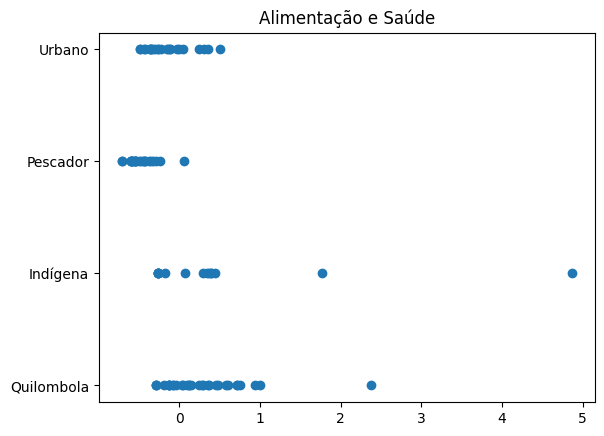

In [ ]:
plt.scatter(concatenated_df['col1'], concatenated_df['perfil'])
plt.title("Alimentação e Saúde")
plt.show()

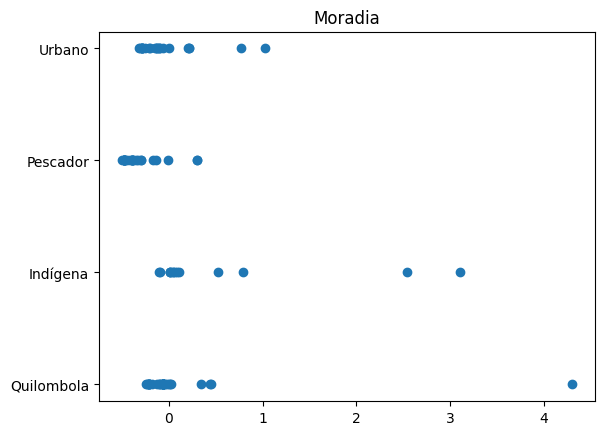

In [ ]:
plt.scatter(concatenated_df['col1'], concatenated_df['perfil'])
plt.title("Moradia")
plt.show()

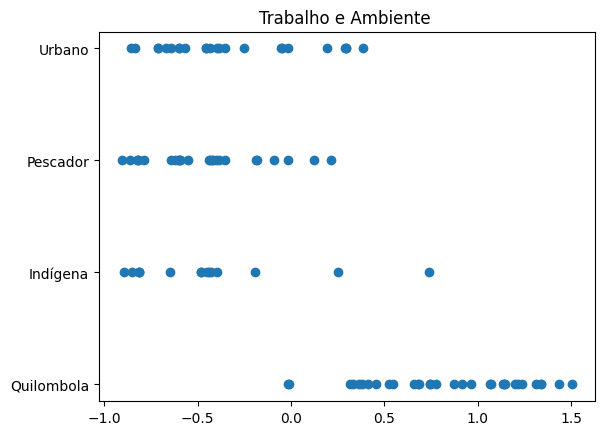

In [ ]:
plt.scatter(concatenated_df['col1'], concatenated_df['perfil'])
plt.title("Trabalho e Ambiente")
plt.show()

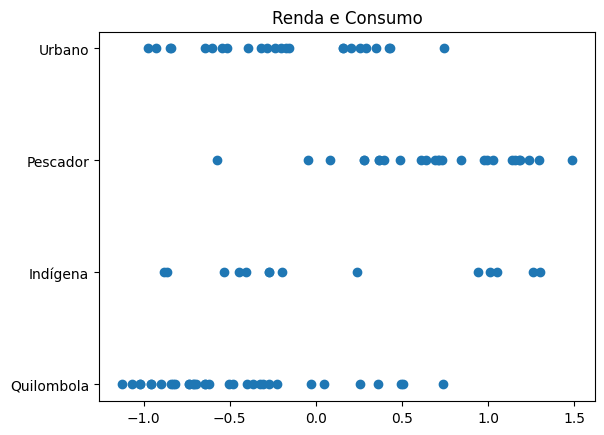

In [ ]:
plt.scatter(concatenated_df['col1'], concatenated_df['perfil'])
plt.title("Renda e Consumo")
plt.show()

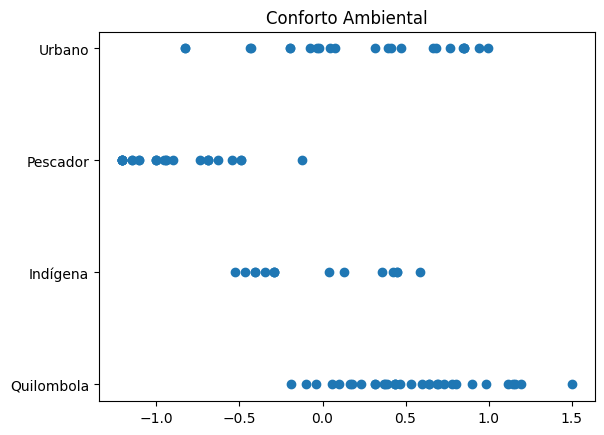

In [ ]:
plt.scatter(concatenated_df['col1'], concatenated_df['perfil'])
plt.title("Conforto Ambiental")
plt.show()

##*TESTES*


Aglutinar os nichos Renda e Consumo / Conforto Ambiental

### Carregando dados

In [ ]:
nichos = pd.read_excel("/content/drive/MyDrive/Pesquisas e Projetos/Projeto Comunidades - Análise de dados/Comunidadesv3.xlsx").filter(["P16", "P17", "P18", "P19", "P20", "P21", "P22", "P23", "P24", "P25", "Perf. Comun."])
nichos = nichos.loc[0:103].reset_index(drop=True)
nichos

,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,Perf. Comun.
0,3,2,2,2,2,5,5,3,3,3,Quilombola
1,3,2,2,4,3,3,3,3,3,3,Quilombola
2,4,3,5,5,4,3,5,5,3,3,Quilombola
3,2,1,2,2,3,5,4,3,3,4,Quilombola
4,3,1,1,3,3,5,5,3,3,3,Quilombola
...,...,...,...,...,...,...,...,...,...,...,...
99,4,4,3,5,4,5,5,4,4,5,Indígena
100,4,4,4,5,4,5,5,5,4,5,Indígena
101,4,4,3,4,4,5,5,5,3,5,Indígena
102,4,3,4,4,4,5,5,5,3,5,Indígena


In [ ]:
nichos.replace('X', pd.NA, inplace=True)
nichos.dropna(inplace=True)
nichos = nichos.reset_index()
nichos = nichos.drop('index', axis=1)
nichos.rename(columns={'Perf. Comun.': 'perfil'}, inplace=True)
nichos

,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,perfil
0,3,2,2,2,2,5,5,3,3,3,Quilombola
1,3,2,2,4,3,3,3,3,3,3,Quilombola
2,4,3,5,5,4,3,5,5,3,3,Quilombola
3,2,1,2,2,3,5,4,3,3,4,Quilombola
4,3,1,1,3,3,5,5,3,3,3,Quilombola
...,...,...,...,...,...,...,...,...,...,...,...
91,4,4,3,5,4,5,5,4,4,5,Indígena
92,4,4,4,5,4,5,5,5,4,5,Indígena
93,4,4,3,4,4,5,5,5,3,5,Indígena
94,4,3,4,4,4,5,5,5,3,5,Indígena


In [ ]:
nicho_num = nichos.drop('perfil', axis=1)

### Treinando modelo

In [ ]:
mca = MCA(n_components=2)  # Número de dimensões escolhido (pode ser diferente)

# Ajustar a MCA aos dados
mca.fit(nichos)

coordenadas_linhas = mca.row_coordinates(nichos) # Observações (comunidades)
coordenadas_colunas = mca.column_coordinates(nicho_num) # variáveis (perguntas)

/usr/local/lib/python3.10/dist-packages/prince/mca.py:37: FutureWarning:

In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)

/usr/local/lib/python3.10/dist-packages/prince/mca.py:37: FutureWarning:

In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)

/usr/local/lib/python3.10/dist-packages/prince/mca.py:37: FutureWarning:

In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)

/usr/local/lib/python3.10/dist-packages/prince/mca.py:37: FutureWarning:

In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)

/usr/local/lib/python3.10/dist-packages/prince/mca.py:37: FutureWarning:

In a future version, the Index constructor will not infer numeric dtypes when passed o

In [ ]:
coordenadas_linhas

,0,1
0,-0.588724,-0.601646
1,-0.890936,-0.724850
2,-0.023084,-0.237095
3,-0.648441,-0.528111
4,-0.653993,-0.236099
...,...,...
91,0.751750,-0.250051
92,1.040583,-0.080468
93,0.723432,-0.411066
94,0.692405,-0.340710


In [ ]:
concatenated_df = pd.concat([coordenadas_linhas, comu], axis=1) # concatenando os dataframes
concatenated_df.columns = ['col1', 'col2', 'perfil'] # nomeando colunas
concatenated_df.dropna(inplace=True)
concatenated_df

,col1,col2,perfil
0,-0.588724,-0.601646,Quilombola
1,-0.890936,-0.724850,Quilombola
2,-0.023084,-0.237095,Quilombola
3,-0.648441,-0.528111,Quilombola
4,-0.653993,-0.236099,Quilombola
...,...,...,...
91,0.751750,-0.250051,Urbano
92,1.040583,-0.080468,Indígena
93,0.723432,-0.411066,Indígena
94,0.692405,-0.340710,Indígena


In [ ]:
import pandas as pd
import plotly.express as px

fig = px.scatter(concatenated_df, x='col1', y='col2', color='perfil', title='Gráfico de Dispersão das Comunidades')

fig.update_layout(
    xaxis_title='Col 1',
    yaxis_title='Col 2'
)

fig.show()

## Teste MCA em cima dos perfis da comunidade aplicado ao EIXO 1 (redimensionamento de 2)

### Carregando dados

In [ ]:
nichos_2 = pd.read_excel("/content/drive/MyDrive/Pesquisas e Projetos/Projeto Comunidades - Análise de dados/Comunidadesv3.xlsx").filter(["P21", "P22", "P23", "P24", "P25", "Perf. Comun."])
nichos_2 = nichos_2.loc[0:103].reset_index(drop=True)
nichos_2

,P21,P22,P23,P24,P25,Perf. Comun.
0,5,5,3,3,3,Quilombola
1,3,3,3,3,3,Quilombola
2,3,5,5,3,3,Quilombola
3,5,4,3,3,4,Quilombola
4,5,5,3,3,3,Quilombola
...,...,...,...,...,...,...
99,5,5,4,4,5,Indígena
100,5,5,5,4,5,Indígena
101,5,5,5,3,5,Indígena
102,5,5,5,3,5,Indígena


In [ ]:
nichos_2.replace('X', pd.NA, inplace=True)
nichos_2.dropna(inplace=True)
nichos_2 = nichos_2.reset_index()
nichos_2 = nichos_2.drop('index', axis=1)
nichos_2.rename(columns={'Perf. Comun.': 'perfil'}, inplace=True)
nichos_2

,P21,P22,P23,P24,P25,perfil
0,5,5,3,3,3,Quilombola
1,3,3,3,3,3,Quilombola
2,3,5,5,3,3,Quilombola
3,5,4,3,3,4,Quilombola
4,5,5,3,3,3,Quilombola
...,...,...,...,...,...,...
93,5,5,4,4,5,Indígena
94,5,5,5,4,5,Indígena
95,5,5,5,3,5,Indígena
96,5,5,5,3,5,Indígena


In [ ]:
nicho_num = nichos_2.drop('perfil', axis=1)

### Treino e resultados

In [ ]:
mca = MCA(n_components=2)  # Número de dimensões escolhido (pode ser diferente)

# Ajustar a MCA aos dados
mca.fit(nichos_2)

coordenadas_linhas = mca.row_coordinates(nichos_2) # Observações (comunidades)
coordenadas_colunas = mca.column_coordinates(nicho_num) # variáveis (perguntas)

/usr/local/lib/python3.10/dist-packages/prince/mca.py:37: FutureWarning:

In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)

/usr/local/lib/python3.10/dist-packages/prince/mca.py:37: FutureWarning:

In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)

/usr/local/lib/python3.10/dist-packages/prince/mca.py:37: FutureWarning:

In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)

/usr/local/lib/python3.10/dist-packages/prince/mca.py:37: FutureWarning:

In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)

/usr/local/lib/python3.10/dist-packages/prince/mca.py:37: FutureWarning:

In a future version, the Index constructor will not infer numeric dtypes when passed o

In [ ]:
concatenated_df = pd.concat([coordenadas_linhas, comu], axis=1) # concatenando os dataframes
concatenated_df.columns = ['col1', 'col2', 'perfil'] # nomeando colunas
concatenated_df.dropna(inplace=True)
concatenated_df

,col1,col2,perfil
0,0.434589,-0.269848,Quilombola
1,1.156646,-0.551304,Quilombola
2,0.596804,-0.303740,Quilombola
3,0.642511,-0.436550,Quilombola
4,0.434589,-0.269848,Quilombola
...,...,...,...
93,-0.406852,-0.317452,Indígena
94,-0.464004,-0.091340,Indígena
95,-0.289834,0.052204,Indígena
96,-0.289834,0.052204,Indígena


###Resultados

In [ ]:
import pandas as pd
import plotly.express as px

fig = px.scatter(concatenated_df, x='col1', y='col2', color='perfil', title='Gráfico de Dispersão das Comunidades (nicho Alimentação e Saúde)')

fig.update_layout(
    xaxis_title='Col 1',
    yaxis_title='Col 2'
)

fig.show()

In [ ]:
import pandas as pd
import plotly.express as px

fig = px.scatter(concatenated_df, x='col1', y='col2', color='perfil', title='Gráfico de Dispersão das Comunidades (nicho Moradia)')

fig.update_layout(
    xaxis_title='Col 1',
    yaxis_title='Col 2'
)

fig.show()

In [ ]:
import pandas as pd
import plotly.express as px

fig = px.scatter(concatenated_df, x='col1', y='col2', color='perfil', title='Gráfico de Dispersão das Comunidades (nicho Trabalho e Ambiente)')

fig.update_layout(
    xaxis_title='Col 1',
    yaxis_title='Col 2'
)

fig.show()

In [ ]:
import pandas as pd
import plotly.express as px

fig = px.scatter(concatenated_df, x='col1', y='col2', color='perfil', title='Gráfico de Dispersão das Comunidades (nicho Renda e Consumo)')

fig.update_layout(
    xaxis_title='Col 1',
    yaxis_title='Col 2'
)

fig.show()

In [ ]:
import pandas as pd
import plotly.express as px

fig = px.scatter(concatenated_df, x='col1', y='col2', color='perfil', title='Gráfico de Dispersão das Comunidades (nicho Conforto Ambiental)')

fig.update_layout(
    xaxis_title='Col 1',
    yaxis_title='Col 2'
)

fig.show()

# Agrupando todos as perguntas

##SOBREVIVÊNCIA/NECESSIDADES HUMANAS

###Carregando dados

In [ ]:
tot = pd.read_excel("/content/drive/MyDrive/Pesquisas e Projetos/Projeto Comunidades - Análise de dados/Comunidadesv3.xlsx").filter(["P01", "P02", "P03", "P04", "P05", "P06", "P07", "P08", "P09", "P10", "P11", "P12", "P13", "P14", "P15", "P16", "P17", "P18", "P19", "P20", "P21", "P22", "P23", "P24", "P25", "Perf. Comun."])
tot = tot.loc[0:103].reset_index(drop=True)
tot

,P01,P02,P03,P04,P05,P06,P07,P08,P09,P10,...,P17,P18,P19,P20,P21,P22,P23,P24,P25,Perf. Comun.
0,5,5,5,3,5,3,3,3,2,4,...,2,2,2,2,5,5,3,3,3,Quilombola
1,5,5,3,3,3,4,5,5,3,3,...,2,2,4,3,3,3,3,3,3,Quilombola
2,5,5,5,4,5,5,5,5,2,3,...,3,5,5,4,3,5,5,3,3,Quilombola
3,4,5,4,3,4,5,5,4,3,4,...,1,2,2,3,5,4,3,3,4,Quilombola
4,5,5,3,3,5,5,5,5,3,4,...,1,1,3,3,5,5,3,3,3,Quilombola
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,5,5,4,5,5,5,4,4,4,5,...,4,3,5,4,5,5,4,4,5,Indígena
100,5,5,5,5,5,5,5,4,4,5,...,4,4,5,4,5,5,5,4,5,Indígena
101,5,5,4,5,5,5,5,5,3,5,...,4,3,4,4,5,5,5,3,5,Indígena
102,5,4,4,5,5,5,5,4,2,5,...,3,4,4,4,5,5,5,3,5,Indígena


In [ ]:
tot.replace('X', pd.NA, inplace=True)
tot.dropna(inplace=True)
tot = tot.reset_index()
tot = tot.drop('index', axis=1)
tot.rename(columns={'Perf. Comun.': 'perfil'}, inplace=True)
tot

,P01,P02,P03,P04,P05,P06,P07,P08,P09,P10,...,P17,P18,P19,P20,P21,P22,P23,P24,P25,perfil
0,5,5,3,3,3,4,5,5,3,3,...,2,2,4,3,3,3,3,3,3,Quilombola
1,5,5,5,4,5,5,5,5,2,3,...,3,5,5,4,3,5,5,3,3,Quilombola
2,4,5,4,3,4,5,5,4,3,4,...,1,2,2,3,5,4,3,3,4,Quilombola
3,5,5,3,3,5,5,5,5,3,4,...,1,1,3,3,5,5,3,3,3,Quilombola
4,4,4,3,3,4,5,4,5,3,3,...,3,2,2,2,3,4,3,2,3,Quilombola
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,5,5,4,5,5,5,4,4,4,5,...,4,3,5,4,5,5,4,4,5,Indígena
90,5,5,5,5,5,5,5,4,4,5,...,4,4,5,4,5,5,5,4,5,Indígena
91,5,5,4,5,5,5,5,5,3,5,...,4,3,4,4,5,5,5,3,5,Indígena
92,5,4,4,5,5,5,5,4,2,5,...,3,4,4,4,5,5,5,3,5,Indígena


In [ ]:
comu = tot['perfil']

In [ ]:
nicho_num = tot.drop('perfil', axis=1)

###Treino e resultados

In [ ]:
mca = MCA(n_components=3)  # Número de dimensões escolhido (pode ser diferente)

# Ajustar a MCA aos dados
mca.fit(tot)

coordenadas_linhas = mca.row_coordinates(tot) # Observações (comunidades)
coordenadas_colunas = mca.column_coordinates(nicho_num) # variáveis (perguntas)

/usr/local/lib/python3.10/dist-packages/prince/mca.py:37: FutureWarning:

In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)

/usr/local/lib/python3.10/dist-packages/prince/mca.py:37: FutureWarning:

In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)

/usr/local/lib/python3.10/dist-packages/prince/mca.py:37: FutureWarning:

In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)

/usr/local/lib/python3.10/dist-packages/prince/mca.py:37: FutureWarning:

In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)

/usr/local/lib/python3.10/dist-packages/prince/mca.py:37: FutureWarning:

In a future version, the Index constructor will not infer numeric dtypes when passed o

In [ ]:
concatenated_df = pd.concat([coordenadas_linhas, comu], axis=1) # concatenando os dataframes
concatenated_df.columns = ['col1', 'col2', 'col3', 'perfil'] # nomeando colunas
concatenated_df.dropna(inplace=True)
concatenated_df

,col1,col2,col3,perfil
0,0.658963,-0.507275,-0.007243,Quilombola
1,0.076996,-0.037316,-0.367412,Quilombola
2,0.280923,-0.412656,0.329696,Quilombola
3,0.600152,-0.367231,0.124360,Quilombola
4,0.799921,-0.641126,0.304989,Quilombola
...,...,...,...,...
89,-0.772581,-0.032905,0.390677,Indígena
90,-0.873583,0.076887,0.152081,Indígena
91,-0.587331,-0.131187,0.291395,Indígena
92,-0.610090,-0.097335,0.209038,Indígena


In [ ]:
import plotly.express as px
import pandas as pd

fig = px.scatter_3d(concatenated_df, x='col1', y='col2', z='col3', color='perfil')
fig.update_layout(
    scene=dict(
        xaxis_title='col1',
        yaxis_title='col2',
        zaxis_title='col3'
    ),
    title='SOBREVIVÊNCIA/NECESSIDADES HUMANAS',
)
fig.show()

In [ ]:
mca_ctr = MCA(n_components=10)  # Número de dimensões escolhido (pode ser diferente)

# Ajustar a MCA aos dados
mca_ctr.fit(tot)

coordenadas_linhas_ctr = mca_ctr.row_coordinates(tot) # Observações (comunidades)
coordenadas_colunas_ctr = mca_ctr.column_coordinates(nicho_num) # variáveis (perguntas)

/usr/local/lib/python3.10/dist-packages/prince/mca.py:37: FutureWarning:

In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)

/usr/local/lib/python3.10/dist-packages/prince/mca.py:37: FutureWarning:

In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)

/usr/local/lib/python3.10/dist-packages/prince/mca.py:37: FutureWarning:

In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)

/usr/local/lib/python3.10/dist-packages/prince/mca.py:37: FutureWarning:

In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)

/usr/local/lib/python3.10/dist-packages/prince/mca.py:37: FutureWarning:

In a future version, the Index constructor will not infer numeric dtypes when passed o

In [ ]:
concatenated_df_ctr = pd.concat([coordenadas_linhas_ctr, comu], axis=1) # concatenando os dataframes
concatenated_df.columns_ctr = ['col1', 'col2', 'col3', 'col4', 'col5', 'col6', 'col7', 'col8', 'col9', 'col10', 'perfil'] # nomeando colunas
concatenated_df_ctr.dropna(inplace=True)
concatenated_df_ctr

,0,1,2,3,4,5,6,7,8,9,perfil
0,0.658963,-0.507275,-0.007242,0.080737,0.067185,0.051399,-0.134822,-0.017876,0.074125,-0.367211,Quilombola
1,0.076996,-0.037308,-0.367497,-0.507342,0.172509,-0.352108,0.726219,0.133330,-0.446905,-0.138816,Quilombola
2,0.280923,-0.412678,0.329871,-0.080480,0.046612,0.379389,0.058837,0.251714,-0.317265,0.213912,Quilombola
3,0.600152,-0.367250,0.124470,-0.431814,-0.200484,-0.011794,0.224759,0.197285,0.092436,-0.304846,Quilombola
4,0.799921,-0.641122,0.304945,-0.205317,-0.010422,0.181124,-0.013245,0.102720,-0.239628,-0.407303,Quilombola
...,...,...,...,...,...,...,...,...,...,...,...
89,-0.772582,-0.032884,0.390631,-0.219028,0.115037,-0.195724,-0.132072,-0.088367,0.069318,0.278898,Indígena
90,-0.873583,0.076897,0.152048,-0.371648,0.166375,-0.242482,-0.061594,-0.086370,-0.124957,0.218734,Indígena
91,-0.587331,-0.131179,0.291350,-0.534710,0.106031,-0.100964,-0.057752,-0.212821,0.053182,0.257864,Indígena
92,-0.610090,-0.097347,0.209086,-0.550649,0.178536,-0.057925,0.015238,-0.343421,-0.152007,0.235919,Indígena


In [ ]:
concatenated_df_ctr_num = concatenated_df_ctr.drop('perfil', axis=1)

In [ ]:
from kmodes.kmodes import KModes

km_df1 = KModes(n_clusters=3, init = "Huang", n_init = 1, verbose=1)
fitClusters_huang = km_df1.fit_predict(concatenated_df_ctr)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 934.0


In [ ]:
fitClusters_huang

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 2, 2, 2, 2, 2], dtype=uint16)

In [ ]:
clusterCentroidsDf = pd.DataFrame(km_df1.cluster_centroids_)
clusterCentroidsDf.columns = concatenated_df_ctr.columns
clusterCentroidsDf

,0,1,2,3,4,5,6,7,8,9,perfil
0,-0.9273470443448596,-0.32756873425654526,-1.3085230734908273,-0.6830849618428676,-1.1671115308927396,-0.8650219351590663,-0.635259636381394,-0.7557683399232259,-0.7236816739306083,-0.7136631245617767,Pescador
1,-0.10955193837539069,-0.6839785768868307,-0.39710138874201284,-0.5073415302624524,-0.7862757545803166,-0.7993941156887324,-0.4001768583970694,-0.7205615629603503,-0.6414825010083747,-0.526359926315355,Quilombola
2,-0.8735830105674219,-0.2909914126173731,-0.253954349183835,-0.5517087593712627,-0.6435722611905021,-0.24248190909437037,-1.0638243069648021,-0.6755206656951614,-0.4553745780976115,-0.24599153557141698,Indígena


In [ ]:
data_df = concatenated_df_ctr_num.reset_index()

In [ ]:
clustersDf = pd.DataFrame(fitClusters_huang)
clustersDf.columns = ['cluster_predicted']
combinedDf = pd.concat([data_df, clustersDf, comu], axis = 1).reset_index()
combinedDf = combinedDf.drop(['index', 'level_0'], axis = 1)
clustersDf

,cluster_predicted
0,1
1,1
2,1
3,1
4,1
...,...
89,2
90,2
91,2
92,2


In [ ]:
clustersDf['perfil'] = comu
clustersDf

,cluster_predicted,perfil
0,1,Quilombola
1,1,Quilombola
2,1,Quilombola
3,1,Quilombola
4,1,Quilombola
...,...,...
89,2,Indígena
90,2,Indígena
91,2,Indígena
92,2,Indígena


In [ ]:
combinedDf.head()

,0,1,2,3,4,5,6,7,8,9,cluster_predicted,perfil
0,0.658963,-0.507275,-0.007242,0.080737,0.067185,0.051399,-0.134822,-0.017876,0.074125,-0.367211,1,Quilombola
1,0.076996,-0.037308,-0.367497,-0.507342,0.172509,-0.352108,0.726219,0.133330,-0.446905,-0.138816,1,Quilombola
2,0.280923,-0.412678,0.329871,-0.080480,0.046612,0.379389,0.058837,0.251714,-0.317265,0.213912,1,Quilombola
3,0.600152,-0.367250,0.124470,-0.431814,-0.200484,-0.011794,0.224759,0.197285,0.092436,-0.304846,1,Quilombola
4,0.799921,-0.641122,0.304945,-0.205317,-0.010422,0.181124,-0.013245,0.102720,-0.239628,-0.407303,1,Quilombola


In [ ]:
cluster_0 = combinedDf[combinedDf['cluster_predicted'] == 0]
cluster_1 = combinedDf[combinedDf['cluster_predicted'] == 1]
cluster_2 = combinedDf[combinedDf['cluster_predicted'] == 2]

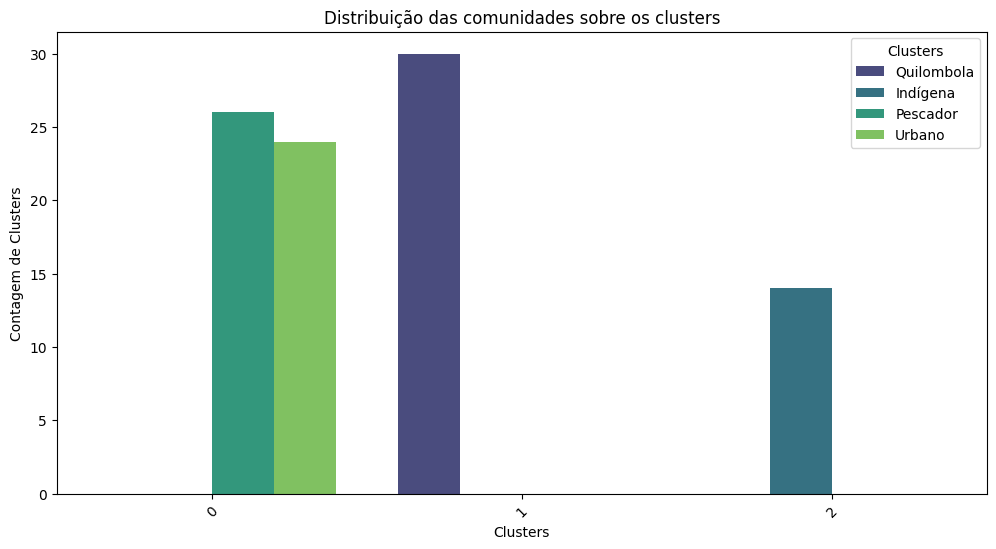

In [ ]:
import seaborn as sns

# Crie um gráfico de barras
plt.figure(figsize=(12, 6))
sns.countplot(data=clustersDf, hue='perfil', x='cluster_predicted', palette='viridis')
plt.xticks(rotation=45)  # Rotacione os rótulos no eixo x para melhor legibilidade
plt.xlabel('Clusters')
plt.ylabel('Contagem de Clusters')
plt.title('Distribuição das comunidades sobre os clusters')
plt.legend(title='Clusters')
plt.show()

## CONFLITOS/ CONSEQUENCIAS AMBIENTAIS

### Análise exploratória

In [ ]:
tot2 = pd.read_excel("/content/drive/MyDrive/Pesquisas e Projetos/Projeto Comunidades - Análise de dados/Comunidadesv3.xlsx").filter(["P26", "P27", "P28", "P29", "P30", "P31", "P32", "P33", "P34", "P35", "P36", "P37", "P38", "P39", "P40", "P41", "P42", "P43", "P44", "P45", "P46", "P47", "P48", "P49", "P50", "Perf. Comun."])
tot2 = tot2.loc[0:103].reset_index(drop=True)
tot2

,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,...,P42,P43,P44,P45,P46,P47,P48,P49,P50,Perf. Comun.
0,3,3,1,1,4,3,5,3,4,3,...,2,4,5,3,3,3,5,3,3,Quilombola
1,3,4,4,3,4,4,4,2,4,3,...,5,3,5,4,4,1,5,3,3,Quilombola
2,4,3,4,3,3,4,3,2,4,4,...,3,5,5,3,3,1,2,2,2,Quilombola
3,4,3,4,2,2,4,4,3,3,3,...,3,4,5,4,3,3,3,4,3,Quilombola
4,3,3,5,1,3,5,5,3,5,5,...,3,5,5,5,5,3,5,5,1,Quilombola
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,5,5,5,5,4,5,5,4,4,5,...,3,5,5,4,5,2,5,5,5,Indígena
100,5,5,5,5,3,5,5,4,5,5,...,3,5,5,4,5,2,5,5,4,Indígena
101,5,5,5,4,3,5,5,3,4,5,...,3,5,5,4,5,2,5,5,5,Indígena
102,5,5,5,5,3,5,5,3,4,5,...,2,5,5,5,5,2,5,5,5,Indígena


In [ ]:
tot2.replace('X', pd.NA, inplace=True)
tot2.dropna(inplace=True)
tot2 = tot2.reset_index()
tot2 = tot2.drop('index', axis=1)
tot2.rename(columns={'Perf. Comun.': 'perfil'}, inplace=True)
tot2

,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,...,P42,P43,P44,P45,P46,P47,P48,P49,P50,perfil
0,3,3,1,1,4,3,5,3,4,3,...,2,4,5,3,3,3,5,3,3,Quilombola
1,3,4,4,3,4,4,4,2,4,3,...,5,3,5,4,4,1,5,3,3,Quilombola
2,4,3,4,3,3,4,3,2,4,4,...,3,5,5,3,3,1,2,2,2,Quilombola
3,4,3,4,2,2,4,4,3,3,3,...,3,4,5,4,3,3,3,4,3,Quilombola
4,3,3,5,1,3,5,5,3,5,5,...,3,5,5,5,5,3,5,5,1,Quilombola
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,5,5,5,5,4,5,5,4,4,5,...,3,5,5,4,5,2,5,5,5,Indígena
94,5,5,5,5,3,5,5,4,5,5,...,3,5,5,4,5,2,5,5,4,Indígena
95,5,5,5,4,3,5,5,3,4,5,...,3,5,5,4,5,2,5,5,5,Indígena
96,5,5,5,5,3,5,5,3,4,5,...,2,5,5,5,5,2,5,5,5,Indígena


In [ ]:
comu2 = tot2['perfil']
nicho_num2 = tot2.drop('perfil', axis=1)

In [ ]:
mca = MCA(n_components=3)  # Número de dimensões escolhido (pode ser diferente)

# Ajustar a MCA aos dados
mca.fit(tot2)

coordenadas_linhas = mca.row_coordinates(tot2) # Observações (comunidades)
coordenadas_colunas = mca.column_coordinates(nicho_num2) # variáveis (perguntas)

/usr/local/lib/python3.10/dist-packages/prince/mca.py:37: FutureWarning:

In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)

/usr/local/lib/python3.10/dist-packages/prince/mca.py:37: FutureWarning:

In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)

/usr/local/lib/python3.10/dist-packages/prince/mca.py:37: FutureWarning:

In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)

/usr/local/lib/python3.10/dist-packages/prince/mca.py:37: FutureWarning:

In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)

/usr/local/lib/python3.10/dist-packages/prince/mca.py:37: FutureWarning:

In a future version, the Index constructor will not infer numeric dtypes when passed o

In [ ]:
concatenated_df = pd.concat([coordenadas_linhas, comu2], axis=1) # concatenando os dataframes
concatenated_df.columns = ['col1', 'col2', 'col3', 'perfil'] # nomeando colunas
concatenated_df.dropna(inplace=True)
concatenated_df

,col1,col2,col3,perfil
0,0.969582,-0.097230,-0.453117,Quilombola
1,0.643213,-0.490928,0.041674,Quilombola
2,0.935640,-0.585221,-0.300903,Quilombola
3,0.607932,-0.656053,0.166838,Quilombola
4,0.509040,0.185127,-0.669185,Quilombola
...,...,...,...,...
93,-0.503437,0.235269,-0.569349,Indígena
94,-0.521023,0.294406,-0.574817,Indígena
95,-0.400841,0.192505,-0.632722,Indígena
96,-0.361961,0.295899,-0.785923,Indígena


In [ ]:
import plotly.express as px
import pandas as pd

fig = px.scatter_3d(concatenated_df, x='col1', y='col2', z='col3', color='perfil')
fig.update_layout(
    scene=dict(
        xaxis_title='col1',
        yaxis_title='col2',
        zaxis_title='col3'
    ),
    title='CONFLITOS/ CONSEQUENCIAS AMBIENTAIS',
)
fig.show()

### Análise pelos Clusters

In [ ]:
mca_ctr = MCA(n_components=10)  # Número de dimensões escolhido (pode ser diferente)

# Ajustar a MCA aos dados
mca_ctr.fit(tot2)

coordenadas_linhas_ctr = mca_ctr.row_coordinates(tot2) # Observações (comunidades)
coordenadas_colunas_ctr = mca_ctr.column_coordinates(nicho_num2) # variáveis (perguntas)

/usr/local/lib/python3.10/dist-packages/prince/mca.py:37: FutureWarning:

In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)

/usr/local/lib/python3.10/dist-packages/prince/mca.py:37: FutureWarning:

In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)

/usr/local/lib/python3.10/dist-packages/prince/mca.py:37: FutureWarning:

In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)

/usr/local/lib/python3.10/dist-packages/prince/mca.py:37: FutureWarning:

In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)

/usr/local/lib/python3.10/dist-packages/prince/mca.py:37: FutureWarning:

In a future version, the Index constructor will not infer numeric dtypes when passed o

In [ ]:
concatenated_df_ctr = pd.concat([coordenadas_linhas_ctr, comu2], axis=1) # concatenando os dataframes
concatenated_df.columns_ctr = ['col1', 'col2', 'col3', 'col4', 'col5', 'col6', 'col7', 'col8', 'col9', 'col10', 'perfil'] # nomeando colunas
concatenated_df_ctr.dropna(inplace=True)
concatenated_df_ctr

,0,1,2,3,4,5,6,7,8,9,perfil
0,0.969582,-0.097229,-0.453116,0.307584,-0.332511,0.399079,0.040089,0.060866,-0.455626,0.332776,Quilombola
1,0.643213,-0.490928,0.041677,-0.103203,0.319283,0.152771,0.229712,0.493754,0.532095,0.400542,Quilombola
2,0.935640,-0.585223,-0.300906,0.349489,0.316049,-0.478804,0.063239,-0.314634,-0.276022,-0.246080,Quilombola
3,0.607931,-0.656052,0.166840,0.141660,0.255929,0.580087,0.214269,0.253928,0.415104,-0.228649,Quilombola
4,0.509040,0.185127,-0.669184,0.280605,-0.054599,-0.128764,-0.014646,0.262303,-0.221041,0.062646,Quilombola
...,...,...,...,...,...,...,...,...,...,...,...
93,-0.503437,0.235269,-0.569347,-0.263195,-0.069476,-0.488790,-0.032696,-0.090261,0.077917,0.362496,Indígena
94,-0.521023,0.294407,-0.574815,-0.246129,-0.121164,-0.509347,-0.120367,-0.098464,0.113089,0.329447,Indígena
95,-0.400841,0.192504,-0.632719,-0.237105,-0.074908,-0.547066,0.052940,-0.123852,0.064085,0.397103,Indígena
96,-0.361961,0.295899,-0.785923,-0.249871,-0.222856,-0.498409,0.104721,-0.251496,-0.065683,0.126239,Indígena


In [ ]:
concatenated_df_ctr_num = concatenated_df_ctr.drop('perfil', axis=1)
concatenated_df_ctr_num

,0,1,2,3,4,5,6,7,8,9
0,0.969582,-0.097229,-0.453116,0.307584,-0.332511,0.399079,0.040089,0.060866,-0.455626,0.332776
1,0.643213,-0.490928,0.041677,-0.103203,0.319283,0.152771,0.229712,0.493754,0.532095,0.400542
2,0.935640,-0.585223,-0.300906,0.349489,0.316049,-0.478804,0.063239,-0.314634,-0.276022,-0.246080
3,0.607931,-0.656052,0.166840,0.141660,0.255929,0.580087,0.214269,0.253928,0.415104,-0.228649
4,0.509040,0.185127,-0.669184,0.280605,-0.054599,-0.128764,-0.014646,0.262303,-0.221041,0.062646
...,...,...,...,...,...,...,...,...,...,...
93,-0.503437,0.235269,-0.569347,-0.263195,-0.069476,-0.488790,-0.032696,-0.090261,0.077917,0.362496
94,-0.521023,0.294407,-0.574815,-0.246129,-0.121164,-0.509347,-0.120367,-0.098464,0.113089,0.329447
95,-0.400841,0.192504,-0.632719,-0.237105,-0.074908,-0.547066,0.052940,-0.123852,0.064085,0.397103
96,-0.361961,0.295899,-0.785923,-0.249871,-0.222856,-0.498409,0.104721,-0.251496,-0.065683,0.126239


In [ ]:
from kmodes.kmodes import KModes

km_df1 = KModes(n_clusters=3, init = "Huang", n_init = 1, verbose=1)
fitClusters_huang = km_df1.fit_predict(concatenated_df_ctr)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 964.0


In [ ]:
fitClusters_huang

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 2, 2, 2, 2, 2], dtype=uint16)

In [ ]:
clusterCentroidsDf = pd.DataFrame(km_df1.cluster_centroids_)
clusterCentroidsDf.columns = concatenated_df_ctr.columns
clusterCentroidsDf

,0,1,2,3,4,5,6,7,8,9,perfil
0,-0.9719271959362668,-0.43029467483641626,-0.7687671040888486,-1.1736262782175364,-0.958046881364136,-0.6939738437840516,-0.8976639647536554,-0.7693868521695949,-0.6539209742805069,-0.867337519811741,Pescador
1,-0.4348350308443895,-0.8194440315331486,-0.669184431871007,-0.1636789897247434,-0.33251107798210705,-0.8486582289397213,-0.6069899473852761,-0.5926947331501148,-0.8466392537983323,-0.42840469082463073,Quilombola
2,-0.14083384828822826,0.055203076882790886,-0.39579947934265863,-0.2932064248024139,-0.40974207924337885,-0.4551991611294626,0.5174329497951052,-0.0824508666153072,0.45188439382060136,-0.011425423407781599,Indígena


In [ ]:
data_df2 = concatenated_df_ctr_num.reset_index()

In [ ]:
clustersDf = pd.DataFrame(fitClusters_huang)
clustersDf.columns = ['cluster_predicted']
combinedDf = pd.concat([data_df2, clustersDf, comu2], axis = 1).reset_index()
combinedDf = combinedDf.drop(['index', 'level_0'], axis = 1)
clustersDf

,cluster_predicted
0,1
1,1
2,1
3,1
4,1
...,...
93,2
94,2
95,2
96,2


In [ ]:
clustersDf['perfil'] = comu2
clustersDf

,cluster_predicted,perfil
0,1,Quilombola
1,1,Quilombola
2,1,Quilombola
3,1,Quilombola
4,1,Quilombola
...,...,...
93,2,Indígena
94,2,Indígena
95,2,Indígena
96,2,Indígena


In [ ]:
combinedDf.head()

,0,1,2,3,4,5,6,7,8,9,cluster_predicted,perfil
0,0.969582,-0.097229,-0.453116,0.307584,-0.332511,0.399079,0.040089,0.060866,-0.455626,0.332776,1,Quilombola
1,0.643213,-0.490928,0.041677,-0.103203,0.319283,0.152771,0.229712,0.493754,0.532095,0.400542,1,Quilombola
2,0.935640,-0.585223,-0.300906,0.349489,0.316049,-0.478804,0.063239,-0.314634,-0.276022,-0.246080,1,Quilombola
3,0.607931,-0.656052,0.166840,0.141660,0.255929,0.580087,0.214269,0.253928,0.415104,-0.228649,1,Quilombola
4,0.509040,0.185127,-0.669184,0.280605,-0.054599,-0.128764,-0.014646,0.262303,-0.221041,0.062646,1,Quilombola


In [ ]:
cluster_0 = combinedDf[combinedDf['cluster_predicted'] == 0]
cluster_1 = combinedDf[combinedDf['cluster_predicted'] == 1]
cluster_2 = combinedDf[combinedDf['cluster_predicted'] == 2]

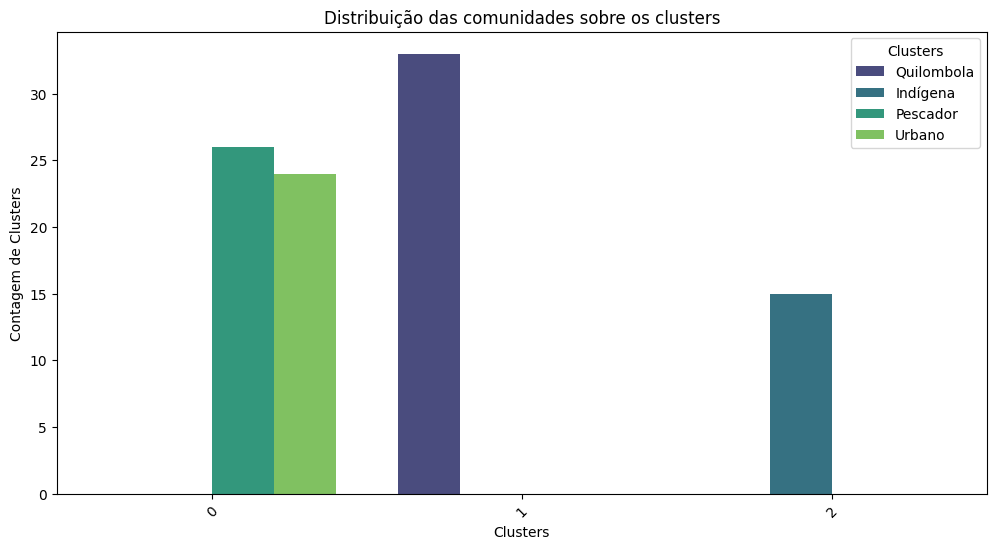

In [ ]:
import seaborn as sns

# Crie um gráfico de barras
plt.figure(figsize=(12, 6))
sns.countplot(data=clustersDf, hue='perfil', x='cluster_predicted', palette='viridis')
plt.xticks(rotation=45)  # Rotacione os rótulos no eixo x para melhor legibilidade
plt.xlabel('Clusters')
plt.ylabel('Contagem de Clusters')
plt.title('Distribuição das comunidades sobre os clusters')
plt.legend(title='Clusters')
plt.show()

In [ ]:
c0 = cluster_0['perfil'].value_counts()
c1 = cluster_1['perfil'].value_counts()
c2 = cluster_2['perfil'].value_counts()

In [ ]:
c0

Pescador    26
Urbano      24
Name: perfil, dtype: int64

In [ ]:
c1

Quilombola    33
Name: perfil, dtype: int64

In [ ]:
c2

Indígena    15
Name: perfil, dtype: int64

##SUSTENTABILIDADE/BOM VIVER

### Exploração de dados

In [ ]:
tot3 = pd.read_excel("/content/drive/MyDrive/Pesquisas e Projetos/Projeto Comunidades - Análise de dados/Comunidadesv3.xlsx").filter(["P51", "P52", "P53", "P54", "P55", "P56", "P57", "P58", "P59", "P60", "P61", "P62", "P63", "P64", "P65", "P66", "P67", "P68", "P69", "P70", "P71", "P72", "P73", "P74", "P75", "Perf. Comun."])
tot3 = tot3.loc[0:103].reset_index(drop=True)
tot3

,P51,P52,P53,P54,P55,P56,P57,P58,P59,P60,...,P67,P68,P69,P70,P71,P72,P73,P74,P75,Perf. Comun.
0,3,3,4,4,4,3,3,2,3,5,...,3,3,3,3,3,5,3,2,4,Quilombola
1,4,5,5,5,4,4,5,3,3,4,...,3,4,2,2,2,5,3,4,3,Quilombola
2,5,3,4,5,X,3,5,3,2,2,...,1,2,2,3,3,4,3,3,2,Quilombola
3,2,3,4,4,4,3,4,3,3,3,...,3,2,3,4,2,1,3,3,3,Quilombola
4,5,5,5,1,5,5,5,5,3,1,...,5,5,5,3,5,5,5,5,3,Quilombola
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,5,4,5,5,5,5,5,4,5,3,...,3,5,5,5,5,5,5,5,4,Indígena
100,5,5,5,5,5,5,5,4,5,4,...,3,5,5,5,5,5,5,5,3,Indígena
101,5,5,5,5,5,5,5,4,5,2,...,3,5,5,5,5,5,5,5,3,Indígena
102,5,4,5,5,5,5,5,4,5,2,...,3,5,5,5,5,5,5,5,3,Indígena


In [ ]:
tot3.replace('X', pd.NA, inplace=True)
tot3.dropna(inplace=True)
tot3 = tot3.reset_index()
tot3 = tot3.drop('index', axis=1)
tot3.rename(columns={'Perf. Comun.': 'perfil'}, inplace=True)
tot3

,P51,P52,P53,P54,P55,P56,P57,P58,P59,P60,...,P67,P68,P69,P70,P71,P72,P73,P74,P75,perfil
0,3,3,4,4,4,3,3,2,3,5,...,3,3,3,3,3,5,3,2,4,Quilombola
1,4,5,5,5,4,4,5,3,3,4,...,3,4,2,2,2,5,3,4,3,Quilombola
2,2,3,4,4,4,3,4,3,3,3,...,3,2,3,4,2,1,3,3,3,Quilombola
3,5,5,5,1,5,5,5,5,3,1,...,5,5,5,3,5,5,5,5,3,Quilombola
4,5,3,3,5,4,3,4,3,3,3,...,3,4,3,4,3,4,3,3,4,Quilombola
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,5,4,5,5,5,5,5,4,5,3,...,3,5,5,5,5,5,5,5,4,Indígena
93,5,5,5,5,5,5,5,4,5,4,...,3,5,5,5,5,5,5,5,3,Indígena
94,5,5,5,5,5,5,5,4,5,2,...,3,5,5,5,5,5,5,5,3,Indígena
95,5,4,5,5,5,5,5,4,5,2,...,3,5,5,5,5,5,5,5,3,Indígena


In [ ]:
comu3 = tot3['perfil']
nicho_num3 = tot3.drop('perfil', axis=1)

In [ ]:
mca = MCA(n_components=3)  # Número de dimensões escolhido (pode ser diferente)

# Ajustar a MCA aos dados
mca.fit(tot3)

coordenadas_linhas = mca.row_coordinates(tot3) # Observações (comunidades)
coordenadas_colunas = mca.column_coordinates(nicho_num3) # variáveis (perguntas)

/usr/local/lib/python3.10/dist-packages/prince/mca.py:37: FutureWarning:

In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)

/usr/local/lib/python3.10/dist-packages/prince/mca.py:37: FutureWarning:

In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)

/usr/local/lib/python3.10/dist-packages/prince/mca.py:37: FutureWarning:

In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)

/usr/local/lib/python3.10/dist-packages/prince/mca.py:37: FutureWarning:

In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)

/usr/local/lib/python3.10/dist-packages/prince/mca.py:37: FutureWarning:

In a future version, the Index constructor will not infer numeric dtypes when passed o

In [ ]:
concatenated_df = pd.concat([coordenadas_linhas, comu3], axis=1) # concatenando os dataframes
concatenated_df.columns = ['col1', 'col2', 'col3', 'perfil'] # nomeando colunas
concatenated_df.dropna(inplace=True)
concatenated_df

,col1,col2,col3,perfil
0,-1.382921,-0.096759,0.608705,Quilombola
1,-0.535833,-0.316874,-0.030177,Quilombola
2,-1.131699,-0.461964,0.621080,Quilombola
3,0.138589,0.788317,0.169582,Quilombola
4,-1.284575,-0.230455,0.333260,Quilombola
...,...,...,...,...
92,0.031750,0.886483,-0.390363,Indígena
93,0.095979,0.958301,-0.446647,Indígena
94,0.130147,0.956037,-0.433699,Indígena
95,0.062029,0.955766,-0.411713,Indígena


In [ ]:
import plotly.express as px
import pandas as pd

fig = px.scatter_3d(concatenated_df, x='col1', y='col2', z='col3', color='perfil')
fig.update_layout(
    scene=dict(
        xaxis_title='col1',
        yaxis_title='col2',
        zaxis_title='col3'
    ),
    title='SUSTENTABILIDADE/BOM VIVER',
)
fig.show()

### Análise pelos Clusters

In [ ]:
mca_ctr = MCA(n_components=10)  # Número de dimensões escolhido (pode ser diferente)

# Ajustar a MCA aos dados
mca_ctr.fit(tot3)

coordenadas_linhas_ctr = mca_ctr.row_coordinates(tot3) # Observações (comunidades)
coordenadas_colunas_ctr = mca_ctr.column_coordinates(nicho_num3) # variáveis (perguntas)

/usr/local/lib/python3.10/dist-packages/prince/mca.py:37: FutureWarning:

In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)

/usr/local/lib/python3.10/dist-packages/prince/mca.py:37: FutureWarning:

In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)

/usr/local/lib/python3.10/dist-packages/prince/mca.py:37: FutureWarning:

In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)

/usr/local/lib/python3.10/dist-packages/prince/mca.py:37: FutureWarning:

In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)

/usr/local/lib/python3.10/dist-packages/prince/mca.py:37: FutureWarning:

In a future version, the Index constructor will not infer numeric dtypes when passed o

In [ ]:
concatenated_df_ctr = pd.concat([coordenadas_linhas_ctr, comu3], axis=1) # concatenando os dataframes
concatenated_df.columns_ctr = ['col1', 'col2', 'col3', 'col4', 'col5', 'col6', 'col7', 'col8', 'col9', 'col10', 'perfil'] # nomeando colunas
concatenated_df_ctr.dropna(inplace=True)
concatenated_df_ctr

,0,1,2,3,4,5,6,7,8,9,perfil
0,-1.382921,-0.096759,0.608706,-0.391801,-0.214941,1.158447,-0.302334,1.696636,-0.238026,-0.592654,Quilombola
1,-0.535833,-0.316874,-0.030176,0.133742,0.135744,-0.433069,-0.507297,0.048306,0.416174,0.444635,Quilombola
2,-1.131699,-0.461964,0.621080,-0.348744,-0.077151,-0.168598,-0.540908,-0.259573,-0.323651,-0.386825,Quilombola
3,0.138589,0.788318,0.169584,-0.014157,-0.224827,0.159313,0.062881,0.075134,-0.068028,0.082261,Quilombola
4,-1.284575,-0.230455,0.333259,-0.566718,0.087369,0.037026,-0.304257,-0.541128,-0.130601,0.036275,Quilombola
...,...,...,...,...,...,...,...,...,...,...,...
92,0.031750,0.886483,-0.390364,0.191537,-0.057238,-0.242284,-0.069995,-0.145922,-0.189131,-0.300733,Indígena
93,0.095979,0.958301,-0.446648,0.228321,-0.227892,-0.175107,0.114664,-0.022017,-0.233047,-0.090391,Indígena
94,0.130147,0.956037,-0.433701,0.353045,-0.215157,-0.130722,0.056413,-0.074412,-0.286169,-0.132864,Indígena
95,0.062029,0.955766,-0.411715,0.404502,-0.189807,-0.198725,0.077379,-0.101056,-0.192753,-0.175492,Indígena


In [ ]:
concatenated_df_ctr_num = concatenated_df_ctr.drop('perfil', axis=1)
concatenated_df_ctr_num

,0,1,2,3,4,5,6,7,8,9
0,-1.382921,-0.096759,0.608706,-0.391801,-0.214941,1.158447,-0.302334,1.696636,-0.238026,-0.592654
1,-0.535833,-0.316874,-0.030176,0.133742,0.135744,-0.433069,-0.507297,0.048306,0.416174,0.444635
2,-1.131699,-0.461964,0.621080,-0.348744,-0.077151,-0.168598,-0.540908,-0.259573,-0.323651,-0.386825
3,0.138589,0.788318,0.169584,-0.014157,-0.224827,0.159313,0.062881,0.075134,-0.068028,0.082261
4,-1.284575,-0.230455,0.333259,-0.566718,0.087369,0.037026,-0.304257,-0.541128,-0.130601,0.036275
...,...,...,...,...,...,...,...,...,...,...
92,0.031750,0.886483,-0.390364,0.191537,-0.057238,-0.242284,-0.069995,-0.145922,-0.189131,-0.300733
93,0.095979,0.958301,-0.446648,0.228321,-0.227892,-0.175107,0.114664,-0.022017,-0.233047,-0.090391
94,0.130147,0.956037,-0.433701,0.353045,-0.215157,-0.130722,0.056413,-0.074412,-0.286169,-0.132864
95,0.062029,0.955766,-0.411715,0.404502,-0.189807,-0.198725,0.077379,-0.101056,-0.192753,-0.175492


In [ ]:
from kmodes.kmodes import KModes

km_df1 = KModes(n_clusters=3, init = "Huang", n_init = 1, verbose=1)
fitClusters_huang = km_df1.fit_predict(concatenated_df_ctr)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 12, cost: 956.0


In [ ]:
fitClusters_huang

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1], dtype=uint16)

In [ ]:
clusterCentroidsDf = pd.DataFrame(km_df1.cluster_centroids_)
clusterCentroidsDf.columns = concatenated_df_ctr.columns

In [ ]:
clusterCentroidsDf

,0,1,2,3,4,5,6,7,8,9,perfil
0,-0.03922545880407201,0.9320715197382755,-0.2788017215604075,0.23522955961946165,0.056418838180041585,-0.19682178225218314,-0.2870149395656875,0.07439080143797097,-0.27558692799637924,-0.24344261330791023,Pescador
1,-1.132075312760478,-0.18833813060389448,0.061257234868545986,-0.8154751368812873,0.3841839264136383,0.20960102038026646,-0.5015904884459409,0.16040087078628562,-0.5158905734225083,-0.25679658086904644,Indígena
2,-1.382921061006477,-0.7779346364340091,-0.434463179498048,-0.5921718032523657,-0.44480972510699257,-0.5394431525561059,-0.6288971866330311,-0.6243096471421796,-0.5260107984077254,-0.5926542216289556,Quilombola


In [ ]:
data_df1 = concatenated_df_ctr_num.reset_index()

In [ ]:
clustersDf = pd.DataFrame(fitClusters_huang)
clustersDf.columns = ['cluster_predicted']
combinedDf = pd.concat([data_df1, clustersDf, comu3], axis = 1).reset_index()
combinedDf = combinedDf.drop(['index', 'level_0'], axis = 1)
clustersDf

,cluster_predicted
0,2
1,2
2,2
3,2
4,2
...,...
92,1
93,1
94,1
95,1


In [ ]:
clustersDf['perfil'] = comu3
clustersDf

,cluster_predicted,Comunidades,perfil
0,2,Quilombola,Quilombola
1,2,Quilombola,Quilombola
2,2,Quilombola,Quilombola
3,2,Quilombola,Quilombola
4,2,Quilombola,Quilombola
...,...,...,...
92,1,Indígena,Indígena
93,1,Indígena,Indígena
94,1,Indígena,Indígena
95,1,Indígena,Indígena


In [ ]:
combinedDf.head()

,0,1,2,3,4,5,6,7,8,9,cluster_predicted,perfil
0,-1.382921,-0.096759,0.608706,-0.391801,-0.214941,1.158447,-0.302334,1.696636,-0.238026,-0.592654,2,Quilombola
1,-0.535833,-0.316874,-0.030176,0.133742,0.135744,-0.433069,-0.507297,0.048306,0.416174,0.444635,2,Quilombola
2,-1.131699,-0.461964,0.621080,-0.348744,-0.077151,-0.168598,-0.540908,-0.259573,-0.323651,-0.386825,2,Quilombola
3,0.138589,0.788318,0.169584,-0.014157,-0.224827,0.159313,0.062881,0.075134,-0.068028,0.082261,2,Quilombola
4,-1.284575,-0.230455,0.333259,-0.566718,0.087369,0.037026,-0.304257,-0.541128,-0.130601,0.036275,2,Quilombola


In [ ]:
cluster_0 = combinedDf[combinedDf['cluster_predicted'] == 0]
cluster_1 = combinedDf[combinedDf['cluster_predicted'] == 1]
cluster_2 = combinedDf[combinedDf['cluster_predicted'] == 2]

In [ ]:
c0 = cluster_0['perfil'].value_counts()
c0

Pescador    26
Urbano      24
Indígena     2
Name: perfil, dtype: int64

In [ ]:
c2 = cluster_1['perfil'].value_counts()
c2

Indígena    13
Name: perfil, dtype: int64

In [ ]:
c3 = cluster_2['perfil'].value_counts()
c3

Quilombola    32
Name: perfil, dtype: int64

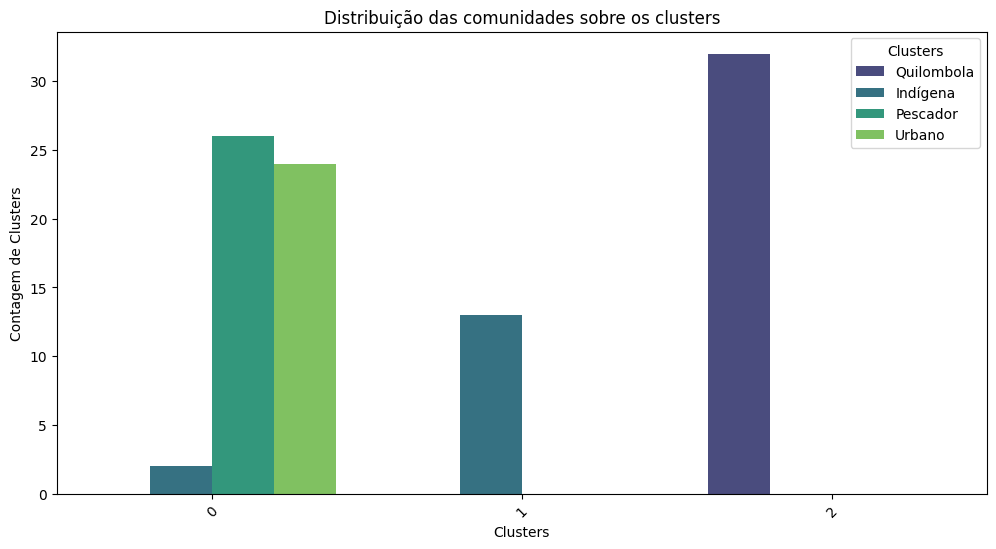

In [ ]:
import seaborn as sns

# Crie um gráfico de barras
plt.figure(figsize=(12, 6))
sns.countplot(data=clustersDf, hue='perfil', x='cluster_predicted', palette='viridis')
plt.xticks(rotation=45)  # Rotacione os rótulos no eixo x para melhor legibilidade
plt.xlabel('Clusters')
plt.ylabel('Contagem de Clusters')
plt.title('Distribuição das comunidades sobre os clusters')
plt.legend(title='Clusters')
plt.show()

# TESTE

In [ ]:
eixo_3 = pd.read_excel("/content/drive/MyDrive/Pesquisas e Projetos/Projeto Comunidades - Análise de dados/Comunidadesv3.xlsx").filter(["P01", "P02", "P03", "P04", "P05", "P06", "P07", "P08", "P09", "P10", "P11", "P12", "P13", "P14", "P15", "P16", "P17", "P18", "P19", "P20", "P21", "P22", "P23", "P24", "P25", "Perf. Comun."])
eixo_3 = eixo_3.loc[0:103].reset_index(drop=True)
eixo_3

,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,...,P42,P43,P44,P45,P46,P47,P48,P49,P50,Perf. Comun.
0,3,3,1,1,4,3,5,3,4,3,...,2,4,5,3,3,3,5,3,3,Quilombola
1,3,4,4,3,4,4,4,2,4,3,...,5,3,5,4,4,1,5,3,3,Quilombola
2,4,3,4,3,3,4,3,2,4,4,...,3,5,5,3,3,1,2,2,2,Quilombola
3,4,3,4,2,2,4,4,3,3,3,...,3,4,5,4,3,3,3,4,3,Quilombola
4,3,3,5,1,3,5,5,3,5,5,...,3,5,5,5,5,3,5,5,1,Quilombola
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,5,5,5,5,4,5,5,4,4,5,...,3,5,5,4,5,2,5,5,5,Indígena
100,5,5,5,5,3,5,5,4,5,5,...,3,5,5,4,5,2,5,5,4,Indígena
101,5,5,5,4,3,5,5,3,4,5,...,3,5,5,4,5,2,5,5,5,Indígena
102,5,5,5,5,3,5,5,3,4,5,...,2,5,5,5,5,2,5,5,5,Indígena


In [ ]:
eixo_3.replace('X', pd.NA, inplace=True)
eixo_3.dropna(inplace=True)

In [ ]:
eixo_3 = eixo_3.reset_index()
eixo_3 = eixo_3.drop('index', axis=1)
eixo_3

,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,...,P42,P43,P44,P45,P46,P47,P48,P49,P50,Perf. Comun.
0,3,3,1,1,4,3,5,3,4,3,...,2,4,5,3,3,3,5,3,3,Quilombola
1,3,4,4,3,4,4,4,2,4,3,...,5,3,5,4,4,1,5,3,3,Quilombola
2,4,3,4,3,3,4,3,2,4,4,...,3,5,5,3,3,1,2,2,2,Quilombola
3,4,3,4,2,2,4,4,3,3,3,...,3,4,5,4,3,3,3,4,3,Quilombola
4,3,3,5,1,3,5,5,3,5,5,...,3,5,5,5,5,3,5,5,1,Quilombola
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,5,5,5,5,4,5,5,4,4,5,...,3,5,5,4,5,2,5,5,5,Indígena
94,5,5,5,5,3,5,5,4,5,5,...,3,5,5,4,5,2,5,5,4,Indígena
95,5,5,5,4,3,5,5,3,4,5,...,3,5,5,4,5,2,5,5,5,Indígena
96,5,5,5,5,3,5,5,3,4,5,...,2,5,5,5,5,2,5,5,5,Indígena


In [ ]:
comunidades = eixo_3['Perf. Comun.']
comunidades.reset_index(drop=True, inplace=True)
comunidades

0     Quilombola
1     Quilombola
2     Quilombola
3     Quilombola
4     Quilombola
         ...    
93      Indígena
94      Indígena
95      Indígena
96      Indígena
97      Indígena
Name: Perf. Comun., Length: 98, dtype: object

In [ ]:
df3 = eixo_3.drop('Perf. Comun.', axis=1)
df3

,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,...,P41,P42,P43,P44,P45,P46,P47,P48,P49,P50
0,3,3,1,1,4,3,5,3,4,3,...,3,2,4,5,3,3,3,5,3,3
1,3,4,4,3,4,4,4,2,4,3,...,4,5,3,5,4,4,1,5,3,3
2,4,3,4,3,3,4,3,2,4,4,...,3,3,5,5,3,3,1,2,2,2
3,4,3,4,2,2,4,4,3,3,3,...,3,3,4,5,4,3,3,3,4,3
4,3,3,5,1,3,5,5,3,5,5,...,3,3,5,5,5,5,3,5,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,5,5,5,5,4,5,5,4,4,5,...,4,3,5,5,4,5,2,5,5,5
94,5,5,5,5,3,5,5,4,5,5,...,4,3,5,5,4,5,2,5,5,4
95,5,5,5,4,3,5,5,3,4,5,...,4,3,5,5,4,5,2,5,5,5
96,5,5,5,5,3,5,5,3,4,5,...,3,2,5,5,5,5,2,5,5,5


In [ ]:
from kmodes.kmodes import KModes

km_df3 = KModes(n_clusters=3, init = "Huang", n_init = 1, verbose=1)
fitClusters_huang = km_df3.fit_predict(df3)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 16, cost: 1149.0
Run 1, iteration: 2/100, moves: 14, cost: 1130.0
Run 1, iteration: 3/100, moves: 6, cost: 1129.0
Run 1, iteration: 4/100, moves: 0, cost: 1129.0


In [ ]:
fitClusters_huang

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 0, 1,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 2, 2, 0, 1, 2, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 2,
       0, 0, 2, 2, 0, 2, 2, 2, 2, 2], dtype=uint16)

In [ ]:
clusterCentroidsDf = pd.DataFrame(km_df3.cluster_centroids_)
clusterCentroidsDf.columns = df3.columns
clusterCentroidsDf

,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,...,P41,P42,P43,P44,P45,P46,P47,P48,P49,P50
0,4,5,5,4,2,5,5,4,2,2,...,5,4,4,5,4,4,4,5,4,4
1,3,3,5,3,3,5,5,3,3,3,...,3,3,5,5,3,3,3,3,3,3
2,5,5,5,5,5,5,5,1,5,5,...,5,5,5,5,4,5,1,5,5,5


In [ ]:
clustersDf = pd.DataFrame(fitClusters_huang)
clustersDf.columns = ['cluster_predicted']
combinedDf = pd.concat([df3, clustersDf, comunidades], axis = 1).reset_index()

In [ ]:
column = eixo_3['Perf. Comun.']
clustersDf['perfil'] = column
clustersDf

,cluster_predicted,perfil
0,1,Quilombola
1,1,Quilombola
2,1,Quilombola
3,1,Quilombola
4,1,Quilombola
...,...,...
93,2,Indígena
94,2,Indígena
95,2,Indígena
96,2,Indígena


In [ ]:
combinedDf = combinedDf.drop('index', axis=1)
combinedDf.head()

,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,...,P43,P44,P45,P46,P47,P48,P49,P50,cluster_predicted,Perf. Comun.
0,3,3,1,1,4,3,5,3,4,3,...,4,5,3,3,3,5,3,3,1,Quilombola
1,3,4,4,3,4,4,4,2,4,3,...,3,5,4,4,1,5,3,3,1,Quilombola
2,4,3,4,3,3,4,3,2,4,4,...,5,5,3,3,1,2,2,2,1,Quilombola
3,4,3,4,2,2,4,4,3,3,3,...,4,5,4,3,3,3,4,3,1,Quilombola
4,3,3,5,1,3,5,5,3,5,5,...,5,5,5,5,3,5,5,1,1,Quilombola


In [ ]:
cluster_0_3 = combinedDf[combinedDf['cluster_predicted'] == 0]
cluster_1_3 = combinedDf[combinedDf['cluster_predicted'] == 1]
cluster_2_3 = combinedDf[combinedDf['cluster_predicted'] == 2]

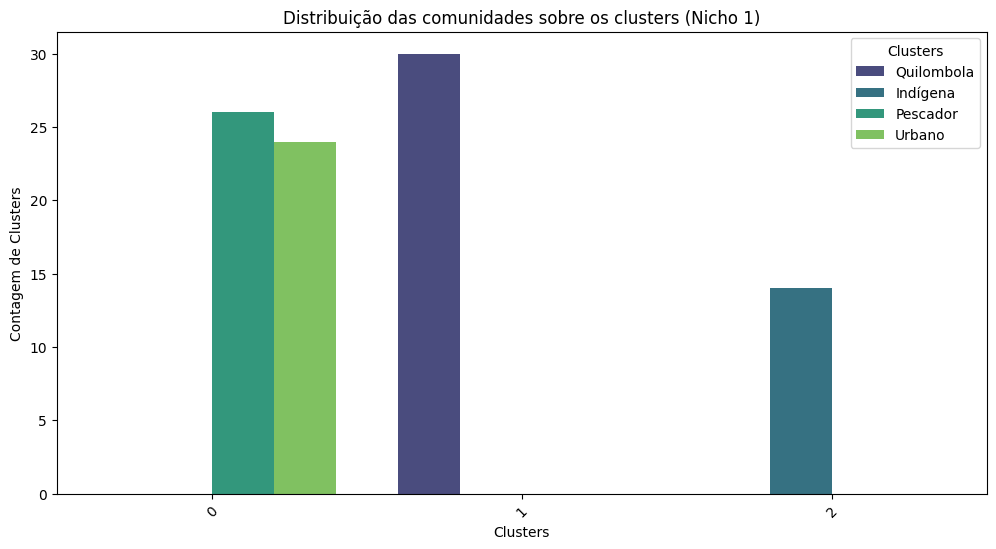

In [ ]:
import seaborn as sns

# Crie um gráfico de barras
plt.figure(figsize=(12, 6))
sns.countplot(data=clustersDf, hue='perfil', x='cluster_predicted', palette='viridis')
plt.xticks(rotation=45)  # Rotacione os rótulos no eixo x para melhor legibilidade
plt.xlabel('Clusters')
plt.ylabel('Contagem de Clusters')
plt.title('Distribuição das comunidades sobre os clusters (Nicho 1)')
plt.legend(title='Clusters')
plt.show()

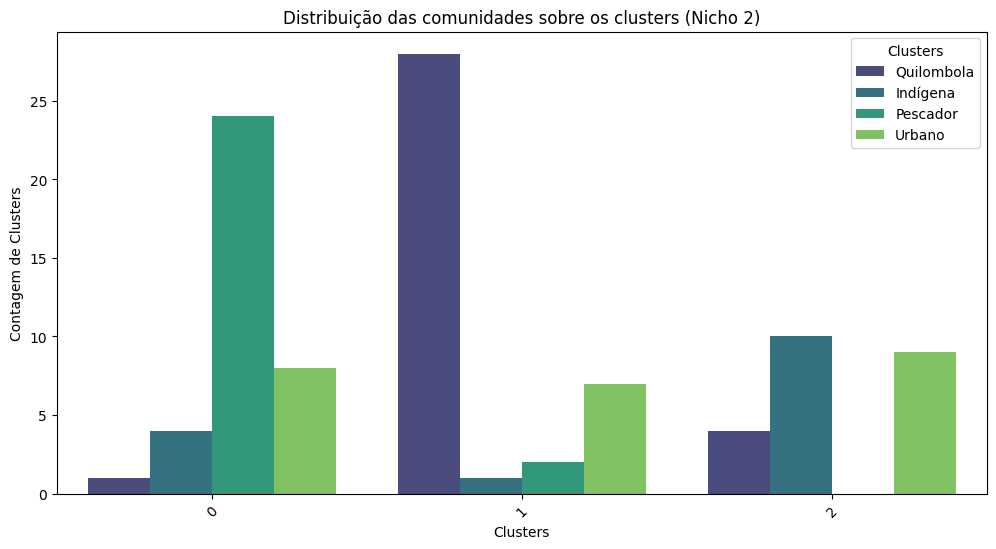

In [ ]:
import seaborn as sns

# Crie um gráfico de barras
plt.figure(figsize=(12, 6))
sns.countplot(data=clustersDf, hue='perfil', x='cluster_predicted', palette='viridis')
plt.xticks(rotation=45)  # Rotacione os rótulos no eixo x para melhor legibilidade
plt.xlabel('Clusters')
plt.ylabel('Contagem de Clusters')
plt.title('Distribuição das comunidades sobre os clusters (Nicho 2)')
plt.legend(title='Clusters')
plt.show()

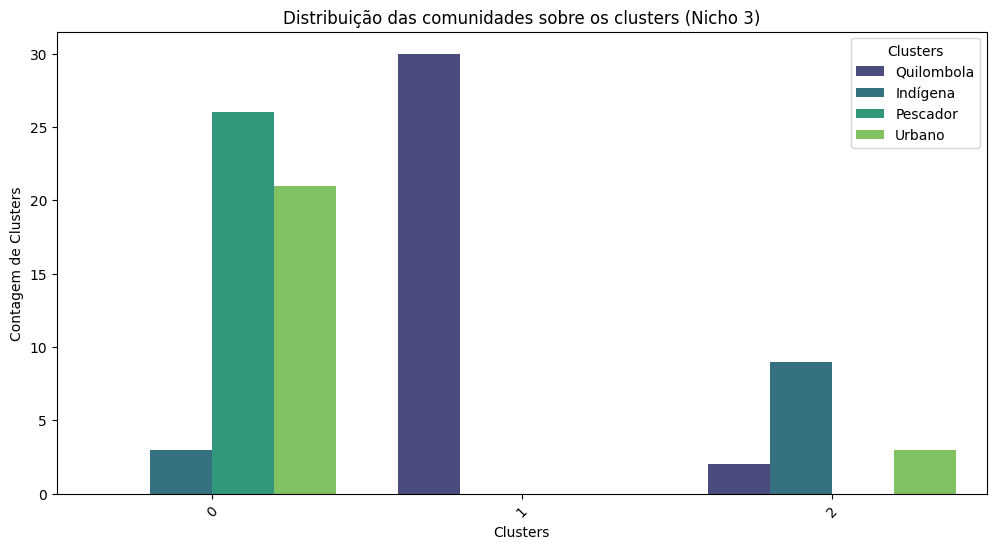

In [ ]:
import seaborn as sns

# Crie um gráfico de barras
plt.figure(figsize=(12, 6))
sns.countplot(data=clustersDf, hue='perfil', x='cluster_predicted', palette='viridis')
plt.xticks(rotation=45)  # Rotacione os rótulos no eixo x para melhor legibilidade
plt.xlabel('Clusters')
plt.ylabel('Contagem de Clusters')
plt.title('Distribuição das comunidades sobre os clusters (Nicho 3)')
plt.legend(title='Clusters')
plt.show()